## ASTR 255 Problem Set 2           
Yu Jun Shen

In [24]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
%matplotlib inline   

In [25]:
# 1. J2000 RA,Dec coordiantes of globular cluster NGC 5024 from NASA Extragalactic database
RA_deg = "198.230133"
Dec_deg = "18.169120"
RA_sexadecimal = "13h 12m 55.23s" 
Dec_sexadecimal = "+18d 10m 08.8s"

print("The J2000 RA and Dec coordinates of NGC 5024 are:")
print(RA_deg, "deg and", Dec_deg, "deg, or")
print(RA_sexadecimal, "and",  Dec_sexadecimal, "in sexadecimal respectively.")

print("Since the RA is about 13 hours, NGC 5024 is best viewed from the Northern \
Hemisphere in early April when it will be directly overhead.")

The J2000 RA and Dec coordinates of NGC 5024 are:
198.230133 deg and 18.169120 deg, or
13h 12m 55.23s and +18d 10m 08.8s in sexadecimal respectively.
Since the RA is about 13 hours, NGC 5024 is best viewed from the Northern Hemisphere in early April when it will be directly overhead.


In [26]:
# 2. Distance modulus to NGC 5024
# Distance modulus is defined as m-M = 5 log_10(d) - 5 with d in units of parsecs

distance_modulus = 5*np.log10(18000)-5  # 18 kiloparsecs
print("The distance modulus to NGC 5024 is", "{:.2f}".format(distance_modulus))


The distance modulus to NGC 5024 is 16.28


In [27]:
data = ascii.read('sdss_NGC5024.csv')
print(data)

     ra          dec     psfMag_u ... psfMagErr_r psfMagErr_i psfMagErr_z
------------ ----------- -------- ... ----------- ----------- -----------
198.21929385 18.01290514 20.89419 ...  0.02609239  0.03035736  0.08001222
198.21322132 18.01313551 22.43742 ...  0.07714201   0.1139929   0.2395389
198.21695357 18.00936774 25.60808 ...   0.2087677   0.2588243   0.3893434
198.21540746 18.01383394 22.15466 ...  0.04848915  0.06703235   0.1874084
198.22092207 18.02044282 24.96855 ...  0.07768602  0.09895361   0.2142978
 198.2228361 18.01676468 25.35837 ...  0.09481524   0.1227535   0.3813226
198.22220408 18.01534179 24.65239 ...   0.1364451   0.1970018   0.6132668
198.21956412 18.01608451 21.01597 ...  0.02617912  0.02637037  0.06523173
198.19503672 18.03041656 23.14224 ...     0.15337   0.2332384   0.7201921
  198.216497 18.33087402 23.19137 ...  0.09395135   0.1143901    0.443655
         ...         ...      ... ...         ...         ...         ...
198.39150393 18.12532499 22.20281 ... 

Spatial distribution plot generated:


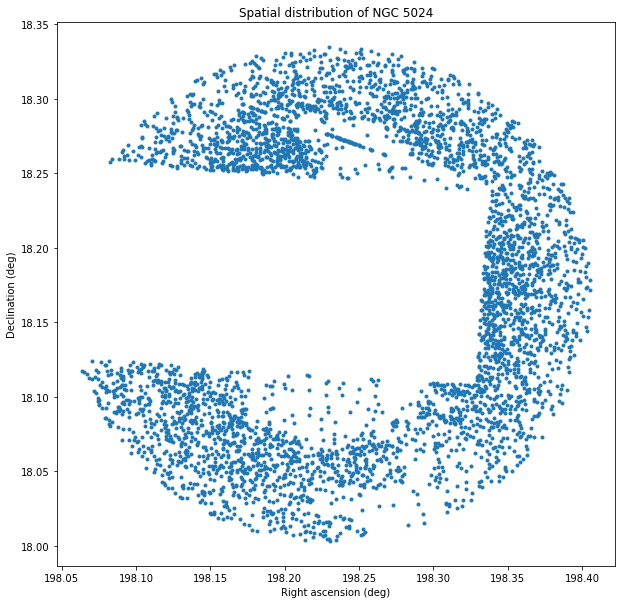

In [28]:
# 6. Plot of RA and Dec of NGC 5024

RA_list = []
Dec_list = []
for row in range(len(data)):   # get column information
    RA_list.append(data[row][0])
    Dec_list.append(data[row][1])

plt.figure(figsize=(10,10))   # bigger size
plt.plot(RA_list, Dec_list, '.')
plt.ylabel('Declination (deg)')
plt.xlabel('Right ascension (deg)')
plt.title('Spatial distribution of NGC 5024')
print('Spatial distribution plot generated:')


(g-r) color versus r-magnitude plot generated:


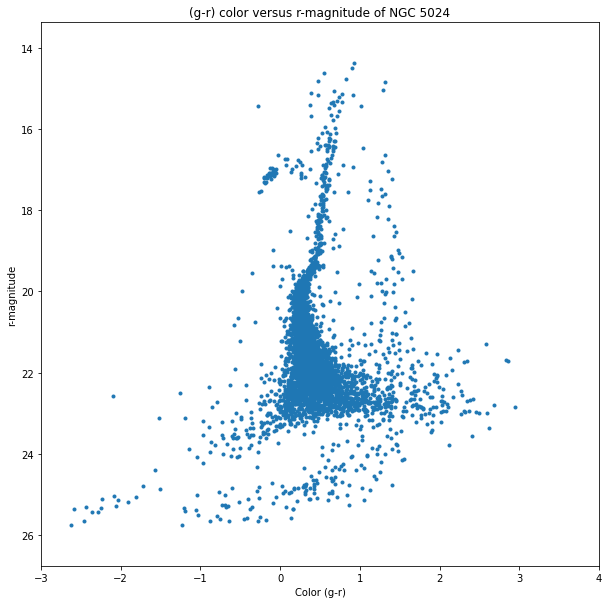

In [29]:
# 7. Plot of (g-r) color versus r-magnitude 

color_list = []
r_mag_list = []
for row in range(len(data)):   # get column information
    color_list.append(data[row][3]-data[row][4])
    r_mag_list.append(data[row][4])

plt.figure(figsize=(10,10))   # bigger size
plt.plot(color_list, r_mag_list, '.')
plt.ylabel('r-magnitude')
plt.xlabel('Color (g-r)')
plt.xlim(-3,4)
plt.ylim(max(r_mag_list)+1, min(r_mag_list)-1)    # use inverted y axis limits
plt.title('(g-r) color versus r-magnitude of NGC 5024')
print('(g-r) color versus r-magnitude plot generated:')


In [30]:
# 7. Why are stars not scattered randomly on this plot
print("Stars do not scatter randomly about the plot due to the main sequence belt on \
the Hertzsprung-Russell diagram. The color-magnitude plot is a variant of the \
Hertzsprung-Russel diagram, hence displays this trend as well. Star magnitude is \
proportional to its temperature so stars move along the belt when they age. ")

Stars do not scatter randomly about the plot due to the main sequence belt on the Hertzsprung-Russell diagram. The color-magnitude plot is a variant of the Hertzsprung-Russel diagram, hence displays this trend as well. Star magnitude is proportional to its temperature so stars move along the belt when they age. 


In [31]:
# 8. r-band magnitude of faintest and brightest stars

faintest = max(r_mag_list)
brightest = min(r_mag_list)
flux_ratio = 10**(-(brightest-faintest)/2.5)
print("The ratio of fluxes between the two extremes is",\
      "{:.2f}".format(flux_ratio), "times.")


The ratio of fluxes between the two extremes is 35788.54 times.


In [32]:
# 9. Paper significance

print("In this paper, Heasley and Christian conducted new observations of the NGC 5024 \
and NGC 5053 globular clusters to generate new BV color-magnitude plots. Using a \
technique known as differential comparison, they concluded that NGC 5024 and NGC 5053 \
have the same age as the known M92 cluster. The addition of NGC 5024 and NGC 5053 \
data suggest that low-metal clusters studied so far all have a similar age.")


In this paper, Heasley and Christian conducted new observations of the NGC 5024 and NGC 5053 globular clusters to generate new BV color-magnitude plots. Using a technique known as differential comparison, they concluded that NGC 5024 and NGC 5053 have the same age as the known M92 cluster. The addition of NGC 5024 and NGC 5053 data suggest that low-metal clusters studied so far all have a similar age.


(g-r) color versus absolute magnitude plot generated:


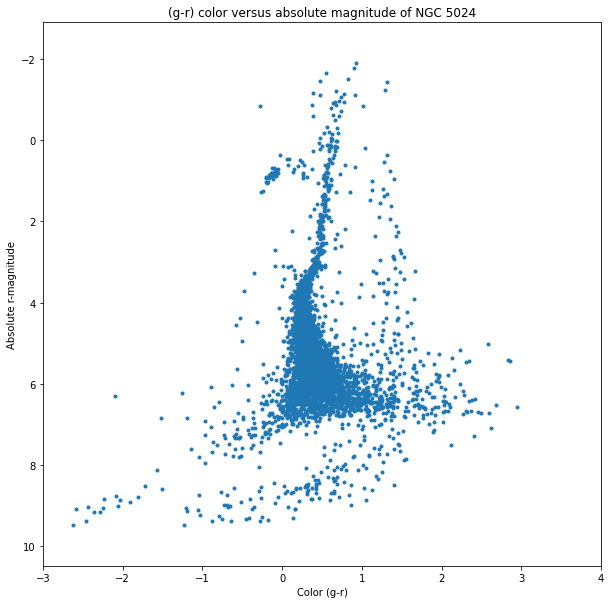

In [33]:
# 10. Bonus
# The apparent (m) and absolute (M) magnitudes of a star are related by:
# M = m - (distance modulus)   
# we have m from the list 

color_list  # keep as x axis
r_abs_mag_list = []
for count in range(len(r_mag_list)):
    r_abs_mag_list.append(r_mag_list[count] - distance_modulus)

plt.figure(figsize=(10,10))   # bigger size
plt.plot(color_list, r_abs_mag_list, '.')
plt.ylabel('Absolute r-magnitude')
plt.xlabel('Color (g-r)')
plt.xlim(-3,4)
plt.ylim(max(r_abs_mag_list)+1, min(r_abs_mag_list)-1)    # use inverted y axis limits
plt.title('(g-r) color versus absolute magnitude of NGC 5024')
print('(g-r) color versus absolute magnitude plot generated:')



In [34]:
# 10. Bonus contd.
print("Since the Sun has an absolute magnitude Mr=4.5, this is similar to the stars \
in NGC 5024 (near the center of the plot vertically).")

Since the Sun has an absolute magnitude Mr=4.5, this is similar to the stars in NGC 5024 (near the center of the plot vertically).
